In [9]:
import netCDF4 as nc
import pandas as pd
from matplotlib import pyplot as plt
import xarray as xr
import numpy as np
import scipy
import plotly.express as px
from scipy.stats import mstats
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import math
import csv
import fiona
import geopandas

In [10]:
shapefile = "/Users/danielblanco/Documents/Mortality_Project/impact-regions-highres-full"
#shapefile="agglomerated-world-new.shp"
sf = geopandas.read_file(shapefile)
print(sf.head())

    gadmid           hierid  color  ISO  \
0  28115.0       CAN.1.2.28    1.0  CAN   
1  28116.0     CAN.1.17.403    2.0  CAN   
2  28119.0     CAN.2.34.951    3.0  CAN   
3  28120.0  CAN.11.259.4274    4.0  CAN   
4  28124.0  CAN.11.269.4448    5.0  CAN   

                                            geometry  
0  MULTIPOLYGON (((-110.05459 53.30730, -110.0911...  
1  POLYGON ((-111.23055 52.91943, -111.23056 52.9...  
2  POLYGON ((-127.68527 55.29570, -127.68806 55.2...  
3  POLYGON ((-77.73080 55.31879, -77.72983 55.318...  
4  POLYGON ((-66.25940 54.99975, -66.24916 54.999...  


In [27]:
df = pd.DataFrame(columns = ['hierid','geometry','TOE'])
df['hierid'] = sf['hierid']
df['geometry'] = sf['geometry']
df

,hierid,geometry,TOE
0,CAN.1.2.28,"MULTIPOLYGON (((-110.05459 53.30730, -110.0911...",NaN
1,CAN.1.17.403,"POLYGON ((-111.23055 52.91943, -111.23056 52.9...",NaN
2,CAN.2.34.951,"POLYGON ((-127.68527 55.29570, -127.68806 55.2...",NaN
3,CAN.11.259.4274,"POLYGON ((-77.73080 55.31879, -77.72983 55.318...",NaN
4,CAN.11.269.4448,"POLYGON ((-66.25940 54.99975, -66.24916 54.999...",NaN
...,...,...,...
24373,BWA.1,"POLYGON ((26.95521 -23.74904, 26.94750 -23.752...",NaN
24374,BWA.7,"POLYGON ((22.50413 -18.11382, 22.98841 -18.018...",NaN
24375,BWA.6.16,"POLYGON ((27.28497 -20.49781, 27.29554 -20.500...",NaN
24376,BWA.5,"POLYGON ((23.05667 -23.31139, 23.07195 -23.311...",NaN


In [4]:
sf.iloc[0,:]

gadmid                                                28115.0
hierid                                             CAN.1.2.28
color                                                     1.0
ISO                                                       CAN
geometry    MULTIPOLYGON (((-110.0545883178711 53.30730056...
Name: 0, dtype: object

#### Notes
We are matching the region of this file <hierid> to the TOE Map 
    
1) In the TOE, we need to add the <hierid> => save the <hierid_TOE> as an array and then add it to the df

In [5]:
# Extract th <hierid> from the shapefile.
dum=np.array(sf.iloc[0,:].values)
dum

array([28115.0, 'CAN.1.2.28', 1.0, 'CAN',
       <MULTIPOLYGON (((-110.055 53.307, -110.091 53.307, -110.091 53.311, -110.091...>],
      dtype=object)

In [6]:
# Indexing Cell.
sfROW,sfCOL = 2,2
dum1=np.array(sf.iloc[sfROW,:].values)[sfCOL]
dum1

3.0

<AxesSubplot: >

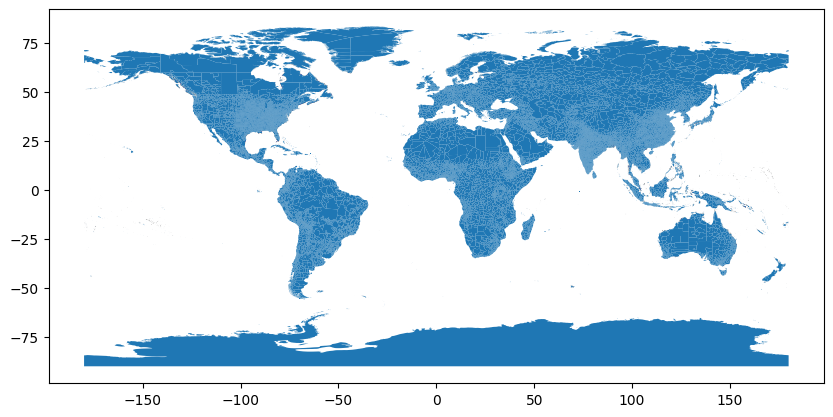

In [7]:
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
sf.plot(ax=ax)

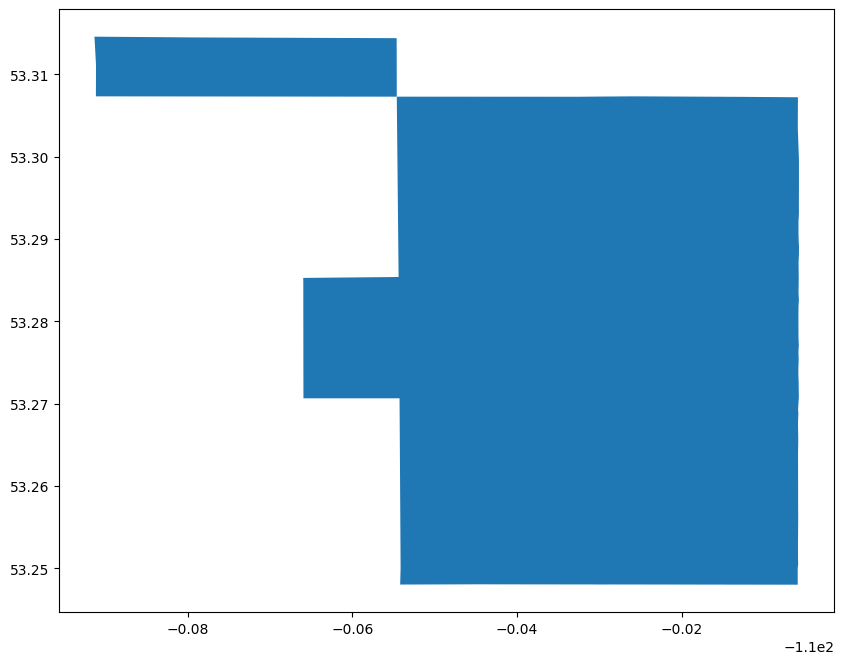

In [8]:
# HW
# 1) Reference the row using the hierID 
# 2) Load the TOE within this notebook

# In the below code, instead of 0
row_value="CAN.1.2.28"


# ++++++
row_index=[0]
# row_index=np.arange(0,1000)
selected_row = sf.iloc[row_index]
selected_sf = geopandas.GeoDataFrame(geometry=selected_row.geometry, crs=sf.crs)
fig, ax = plt.subplots(figsize=(10, 10))
selected_sf.plot(ax=ax)
plt.show()

In [14]:
# Save as individual variables
sf_hierid=sf["hierid"]
sf_poly=sf["geometry"]